# 🩺Diabetes Prediction - Data Preparation

**Objective**: Load and prepare the diabetes dataset
for machine learning classification.  
We will:
1. Load dataset
2. Assign column names
3. Handle missing values
4. Split into train/test
5. Apply feature scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=columns)

In [11]:
print("Dataset shape:", df.shape)
print(data.head())
print(data.info())

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gluco

In [13]:
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)


In [15]:
print("Missing values before imputation:\n", df.isna().sum())

Missing values before imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [19]:
for col in cols_with_zero_invalid:
    df[col] = df[col].fillna(df[col].median())


In [21]:
for col in cols_with_zero_invalid + ["DiabetesPedigreeFunction", "Pregnancies", "Age"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)

In [23]:
print("\nMissing values after cleaning:\n", df.isna().sum())
print("\nDataset shape:", df.shape)
print(df.head())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0  125.000  33.6   
1          1.0     85.0           66.0           29.0  125.000  26.6   
2          8.0    183.0           64.0           29.0  125.000  23.3   
3          1.0     89.0           66.0           23.0  112.875  28.1   
4          0.0    137.0           40.0           35.0  135.875  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [31]:
# To get descriptive statistics for the diabetes dataset
print("Descriptive Statistics for Diabetes Data:")
print(df.describe())

Descriptive Statistics for Diabetes Data:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.656250      72.358073      28.866536  124.691081   
std       3.344157   30.438286      11.697097       7.442353    7.913595   
min       0.000000   44.000000      40.000000      14.500000  112.875000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     104.000000      42.500000  135.875000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.393359                  0.458914   33.199870    0.348958  
std      6.667471                  0.285596   11.628404    0.47

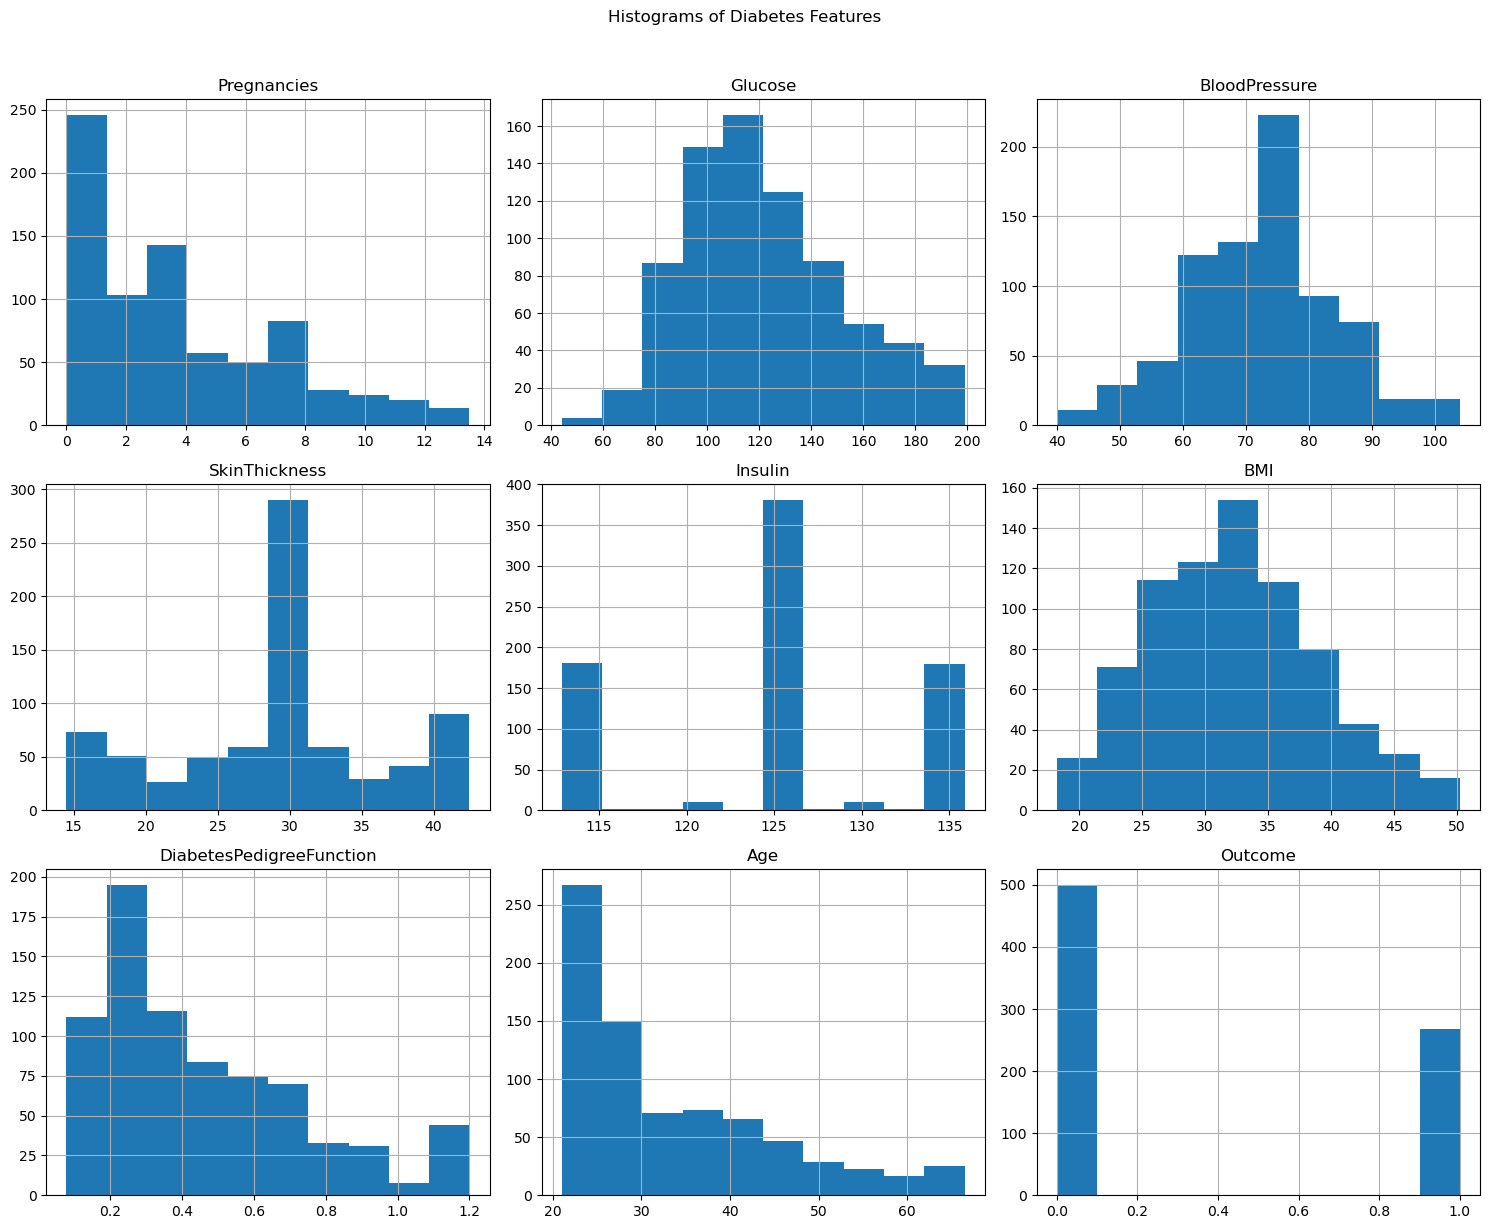

In [33]:
import matplotlib.pyplot as plt

# Histograms for diabetes data
df.hist(figsize=(15, 12))
plt.suptitle('Histograms of Diabetes Features', y=1.02)
plt.tight_layout()
plt.show()

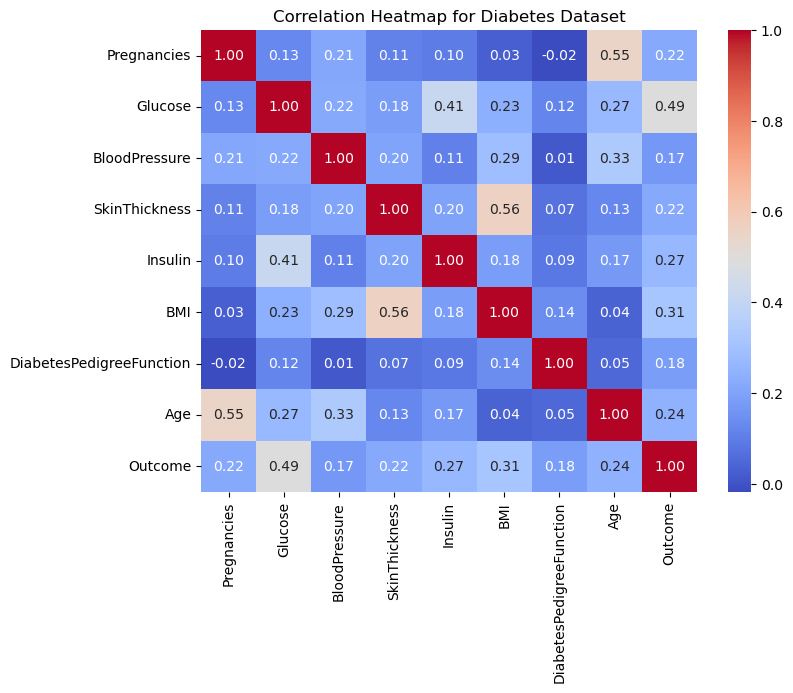

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for diabetes data
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Diabetes Dataset')
plt.show()

Data Preparation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Diabetes Data: Splitting and scaling complete.")
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)

Diabetes Data: Splitting and scaling complete.
Shape of X_train: (614, 8)
Shape of X_test: (154, 8)


Model Building and Evaluation 

Python Code for Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_scaled and y_train are already defined from your data preparation step

# Define the hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
# cv=5 means it will use 5-fold cross-validation
# n_jobs=-1 means it will use all available cores for faster computation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search to the data
# This will try all combinations of hyperparameters and find the best one
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best score found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred_tuned = best_rf_model.predict(X_test_scaled)

print("\nPerformance of the Tuned Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Recall Score: 0.6292358803986711

Performance of the Tuned Random Forest Model:
Accuracy: 0.7467532467532467
Precision: 0.6333333333333333
Recall: 0.6909090909090909
Confusion Matrix:
 [[77 22]
 [17 38]]


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_diabetes_model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50, random_state=42)
rf_diabetes_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [87]:
import joblib
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "diabetes_scaler.pkl")
joblib.dump(list(X_train.columns), "diabetes_features.pkl")

['diabetes_features.pkl']